# 第一节课 使用Keras写一个mlp

mlp就是multilayer perceptron，多层感知机。数据集用的是经典的mnist，数字分类问题。

首先导入keras的各种模块

keras.datasets 里面包含了多种常用数据集，如mnist，cifar10等等，可以实现自动下载和解析等等。

keras.models 里面有最核心的模型结构，如顺序模型结构Sequential

keras.layers 里面有一些常用的层结构，如全连接层Dense

keras.optimizers 里面有一些常用优化函数，如adam等

In [1]:
import keras
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop

Using TensorFlow backend.
/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


载入mnist数据，第一次会自动下载，之后运行会载入本地文件。

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

↓查看一下数据格式，训练集一共有6万张，大小是28*28,单通道灰度图，测试集是1000张。标签是列向量

In [3]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


↓可视化一些图片

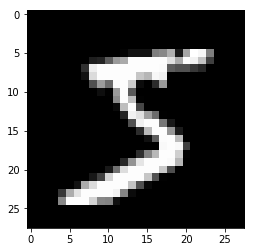

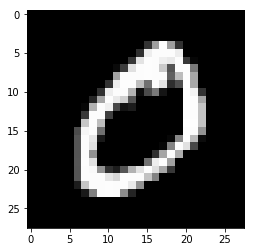

In [4]:
import matplotlib.pyplot as plt
im = plt.imshow(x_train[0],cmap='gray')
plt.show()
im2 = plt.imshow(x_train[1],cmap='gray')
plt.show()

由于mlp的输入是一维向量，所以要转换

将每一幅图像都转换为一个长向量，大小为28*28=784

In [5]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float32')
x_train = x_train.astype('float32')
print(x_train.shape)

(60000, 784)


归一化，将图像的像素归到0~1

In [6]:
x_train = x_train/255
x_test = x_test/255

将label也转换成One-hot标签，这里直接用keras的预置的一个函数 keras.utils.to_categorical

In [7]:
print(y_train[0:10])# 查看原始标签 0~9

[5 0 4 1 9 2 1 3 1 4]


In [8]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

print(y_train[0:10])#查看转换完毕的标签

[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


开始构建模型，模型分包含两个隐层和一个输出层,都是全连接层，使用Sequential构建

其中隐层输出采用ReLU激活函数，Sequential的第一层要指定input_shape，要注意，这里的input_shape 是不包含batch大小的，就只是后面几维

In [9]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [10]:
model.summary()#这一句用来输出网络结构

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


配置模型，主要包括
loss：loss计算方法（损失函数）

optimizer：优化函数

metrics：指定哪些量需要在训练及测试中关注，一般都会写accuracy

In [11]:
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(),
             metrics=['accuracy'])

开始训练。这里使用的是model对象的fit方法。前两个参数分别是**完整的训练数据和训练标签**

batch_size 表示每一次塞入多少张图片

epochs 表示训练几轮

verbose 表示用何种方式显示输出信息，0表示不输出，1表示在一直输出更新，2表示每一个epoch才输出一次。

validation_data 表示验证集，格式和训练集一样，如果此参数不为空的话，每一个epoch过后就会输出验证集的loss和accuracy

In [12]:
model.fit(x_train,y_train,batch_size=64,epochs=2,verbose=1,
         validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 21s - loss: 0.2260 - acc: 0.9299 - val_loss: 0.1394 - val_acc: 0.9582
Epoch 2/2
60000/60000 [==============================] - 20s - loss: 0.1072 - acc: 0.9693 - val_loss: 0.1353 - val_acc: 0.9621


测试结果，输出为loss以及其他之前compile模型时指定过的metrics的值

In [13]:
score = model.evaluate(x_test,y_test,verbose=1)
print('Test loss:',score[0])
print('Test accuracy',score[1])

 9792/10000 [============================>.] - ETA: 0sTest loss: 0.135303073547
Test accuracy 0.9621


## 总结

本文主要写了一个最简单的多层感知机模型，目的是熟悉keras最基本的操作。

知识点：

1. 学习载入Keras中预置的数据库及数据库数据的基本变换
1. Sequential模型的定义，以及如何添加层
1. 如何对Dense层及Dropout层进行基本的配置
1. 学习使用compile对网络进行配置
1. 使用fit方法来对小数据库进行训练，这里的小数据库指的是所有数据可以一次性载入到内存
1. 使用evaluate方法来对模型进行效果评估

参考：
> https://github.com/keras-team/keras/tree/master/examples